## Import das bibliotecas

In [70]:

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import pandas as pd
import time
 
img_width, img_height = 224, 224

## Parâmetros de Rede

In [71]:
train_data_dir = 'output/train'
validation_data_dir = 'output/test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
# Batch size (number of samples propagated through the network at each training iteration)
batch_size = 16

In [72]:
# Checking the image data format used by Keras
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Dicionário com a quantidade de Neurônios por Camada:

In [73]:
# Dicionário com a quantidade de neurônio por camada:
Neuronios = [
              ['Default', 32,32,64,0,64,1,'model_1_weights',0,0,0], 
              ['Default/2', 16,16,32,0,32,1,'model_2_weights',0,0,0],
              ['Default*2', 64,64,128,0,128,1,'model_3_weights',0,0,0],
              ['Minimo', 1,1,2,0,2,1,'model_4_weights',0,0,0],
              ['Unitario', 1,1,1,0,1,1,'model_5_weights',0,0,0],
              ['Default/4', 8,8,16,0,16,1,'model_6_weights',0,0,0],
              ['Default/8', 4,4,8,0,8,1,'model_7_weights',0,0,0],
              ['Minimo*2', 2,2,4,0,4,1,'model_8_weights',0,0,0],
              ['Default/4_SEM_C2', 8,8,0,0,16,1,'model_9_weights',0,0,0],
              ['Default/4_COM_C4', 8,8,16,16,16,1,'model_10_weights',0,0,0]
              ]
dic=pd.DataFrame(Neuronios,columns=['Nome','In','C_1','C_2','C_3','C_4','Exit','Save','Time','Acertos','Erros'])



## Escolha da quantidade de neurônios pela linha do dicionário

In [373]:
#Escolha da qtd de neurônios:
linha=dic[dic['Nome']=='Default']

## Criação das Camadas da NN

In [374]:

model = Sequential()
model.add(Conv2D(linha['In'].iloc[0], (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(linha['C_1'].iloc[0], (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

if linha['C_2'].iloc[0] != 0:
    model.add(Conv2D(linha['C_2'].iloc[0], (2, 2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


if linha['C_3'].iloc[0] != 0:
    model.add(Conv2D(linha['C_3'].iloc[0], (2, 2)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

# The output from the last convolutional layer is flattened into a 1D array
model.add(Flatten())

model.add(Dense(linha['C_4'].iloc[0]))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# A dense layer with a single unit is added for binary classification
model.add(Dense(linha['Exit'].iloc[0]))
model.add(Activation('sigmoid'))

## Método de Compilação do Modelo:

In [375]:

model.compile(loss='binary_crossentropy',# It measures the difference between the predicted outputs and the true labels, aiming to minimize this difference during training
              optimizer='rmsprop', # It adapts the learning rate for each weight based on the magnitude of the gradients, allowing for faster convergence and better optimization performance
              metrics=['accuracy']) # It calculates the proportion of correctly classified samples out of the total number of samples

## Treinamento do Modelo

In [376]:
start = time.time()

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

end = time.time()

dic.loc[dic['Save']==linha['Save'].iloc[0],'Time']=end-start

Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Epoch 1/10


2023-06-23 18:34:17.464389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - ETA: 0s - loss: 0.8958 - accuracy: 0.5275

2023-06-23 18:34:26.722099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 10s 348ms/step - loss: 0.8958 - accuracy: 0.5275 - val_loss: 0.7078 - val_accuracy: 0.5417
Epoch 2/10
25/25 [==============================] - 8s 319ms/step - loss: 0.6723 - accuracy: 0.6175 - val_loss: 0.6415 - val_accuracy: 0.7396
Epoch 3/10
25/25 [==============================] - 9s 339ms/step - loss: 0.5700 - accuracy: 0.7425 - val_loss: 0.8034 - val_accuracy: 0.5938
Epoch 4/10
25/25 [==============================] - 9s 342ms/step - loss: 0.4741 - accuracy: 0.8050 - val_loss: 0.3934 - val_accuracy: 0.8542
Epoch 5/10
25/25 [==============================] - 8s 334ms/step - loss: 0.3727 - accuracy: 0.8350 - val_loss: 0.2799 - val_accuracy: 0.9271
Epoch 6/10
25/25 [==============================] - 9s 367ms/step - loss: 0.2869 - accuracy: 0.8875 - val_loss: 0.1617 - val_accuracy: 0.9479
Epoch 7/10
25/25 [==============================] - 8s 327ms/step - loss: 0.2327 - accuracy: 0.9275 - val_loss: 0.1828 - val_accuracy: 0.9375
Epoch 8/10
25/25

## Salvando os pesos calculados para cada Neurônio, conforme a qtd de neurônios por camada

In [377]:
model.save(linha['Save'].iloc[0]+'.h5')


## Identificação de Imagens:

In [378]:
# Identificando rachadura da sala de aula

from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model(linha['Save'].iloc[0]+'.h5')
 
image = load_img('sala_de_aula_2.jpeg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted \Class (0 - Negative , 1- Positive): ", label[0][0])

1/1 [==============================] - 0s 58ms/step
Predicted \Class (0 - Negative , 1- Positive):  0.99822056


## Variável de Escolha dos Pesos

In [379]:
#Variável de escolha dos pesos
var_pesos=linha['Save'].iloc[0]
# Se quiser pegar o peso que acabou de calcular, use:
# linha['Save'].iloc[0]
# Se quiser pegar um peso antigo, use:
#'model_5_weights' 

## Import das bibliotecas para Análise da base

In [380]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

## Teste de uma base de dados sem rachadura

In [381]:

# Load the pre-trained model
model = load_model(var_pesos+'.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Negative'

# Initialize empty lists for storing predictions
negative_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        negative_predictions.append(pred[0][0])

# Convert the negative_predictions to numpy array
negative_predictions = np.array(negative_predictions)




1/1 [==============================] - 0s 18ms/step


## Plot dos Resultados obtidos da base_negativa

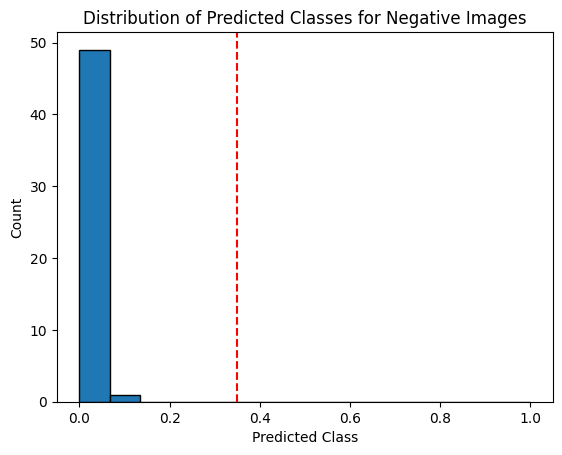

In [382]:
# Plot the histogram
plt.hist(negative_predictions, bins=15, edgecolor='black', range=(0,1))
plt.axvline(x=0.35,color='red',linestyle='dashed')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
#plt.xticks([0.35, 0.5, 0.65], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Negative Images')
plt.show()

## Teste de uma base de dados com rachadura

In [383]:

# Load the pre-trained model
model = load_model(var_pesos+'.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Positive'

# Initialize empty lists for storing predictions
positive_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        positive_predictions.append(pred[0][0])

# Convert the predictions to numpy array
positive_predictions = np.array(positive_predictions)



1/1 [==============================] - 0s 19ms/step


## Plot dos Resultados obtidos da base_positiva

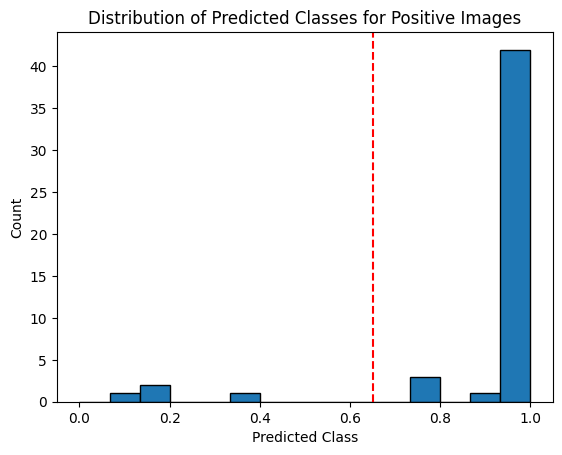

In [384]:

# Plot the histogram
plt.hist(positive_predictions, bins=15, edgecolor='black', range=(0,1))
plt.axvline(x=0.65,color='red',linestyle='dashed')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
#plt.xticks([0.35, 0.5, 0.65], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Positive Images')
plt.show()

## Salvar os resultados no DataFrame de Neurônios

In [385]:
dic.loc[dic['Save']==var_pesos,'Acertos']=len(positive_predictions[positive_predictions>=0.65])+len(negative_predictions[negative_predictions<=0.35])
dic.loc[dic['Save']==var_pesos,'Erros']=len(positive_predictions)+len(negative_predictions)-dic.loc[dic['Save']==var_pesos,'Acertos']

## Exportar os resultados para csv

In [388]:
dic.to_csv('Dicionario_dados.csv')

## Gráficos de Acertos por tempo para dados obtidos com 3 camadas de neurônios

In [393]:
Threelay=dic.copy()

In [394]:
Threelay.drop([8,9],inplace=True)

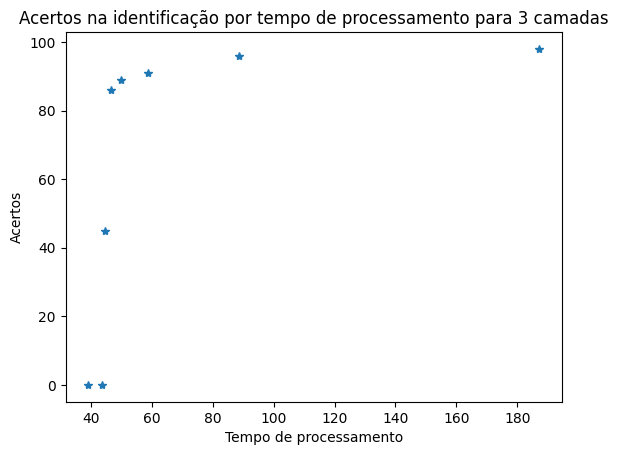

In [403]:
plt.plot(Threelay['Time'],Threelay['Acertos'],'*')
plt.xlabel('Tempo de processamento')
plt.ylabel('Acertos')
plt.title('Acertos na identificação por tempo de processamento para 3 camadas')
plt.savefig(' Acertos na identificação por tempo de processamento para 3 camadas.png')